## Measuring Performance ##
In this notebook, we will analyse the behaviour of the parallel crawler for different number of threads.

In [15]:
# necessary imports
import subprocess
import matplotlib.pyplot as plt

In [18]:
num_threads = 10      # Threads from 1 to num_threads
max_size = 10000    # Until the SetList gets to max_size

link = "https://en.wikipedia.org/wiki/Main_Page"

In [19]:
time_crawler_sl = dict() # dictionary {num_inserted: {num_threads : time (microseconds)} }
time_crawler_bst = dict()
time_overall_sl = dict()
time_overall_bst = dict()

subprocess.run(["make", "clean"])
subprocess.run(["make"])

for sets in ["FineBST", "SetList"]:

    time_crawler = time_crawler_sl if sets == "SetList" else time_crawler_bst
    time_overall = time_overall_sl if sets == "SetList" else time_overall_bst

    for i in range(1, num_threads + 1):
        print(f"working on thread {i} on set {sets}")
        time_crawler[i] = dict()
        
        time_overall[i] = dict()
        
        output = subprocess.run(["./main", link, str(i), str(max_size), sets ,"-s"], capture_output=True)
        
        for inser_str in output.stdout.decode("utf-8").split('\n'):

            if inser_str == '': continue

            if len(inser_str.split(' ')) == 3:
                mode, size, time_i = inser_str.split(' ')

                curr_dict = time_overall if mode == "Overall" else time_crawler
                if int(size) not in curr_dict[i]:
                    curr_dict[i][int(size)] = int(time_i)

subprocess.run(["make", "clean"]);


working on thread 1 on set FineBST
working on thread 2 on set FineBST
working on thread 3 on set FineBST
working on thread 4 on set FineBST
working on thread 5 on set FineBST
working on thread 6 on set FineBST
working on thread 7 on set FineBST
working on thread 8 on set FineBST
working on thread 9 on set FineBST
working on thread 10 on set FineBST
working on thread 1 on set SetList
working on thread 2 on set SetList
working on thread 3 on set SetList
working on thread 4 on set SetList
working on thread 5 on set SetList
working on thread 6 on set SetList
working on thread 7 on set SetList
working on thread 8 on set SetList
working on thread 9 on set SetList
working on thread 10 on set SetList


In [20]:
def plot_performance_threads(datatype, mode):
    if datatype == "BST":
        curr_dict = time_overall_bst if mode == "Overall" else time_crawler_bst
    else:
        curr_dict = time_overall_sl if mode == "Overall" else time_crawler_sl

    title = [mode, "Performance", datatype]
    plt.title(" ".join(title))
    plt.xlabel("Number of Insertions")
    plt.ylabel("Time (seconds)")

    for (thread_no, thread_no_info) in curr_dict.items():

        X = list(thread_no_info.keys())
        Y = []

        time_tot = 0
        for i in range(len(X)):
            time_tot += thread_no_info[X[i]]
            Y.append(time_tot*1e-6)
        if thread_no == 1: 
            plt.plot(X,Y, label = f"{thread_no} thread")
        else:
            plt.plot(X,Y, label = f"{thread_no} threads")
    plt.legend()
    plt.savefig(f'figures/{"_".join(title)}.jpg')
    plt.show()

In [21]:
for datatype in ["FineBST", "SetList"]:
    for mode in ["Overall", "Crawler"]:
        plot_performance_threads(datatype, mode)

AttributeError: 'list' object has no attribute 'join'

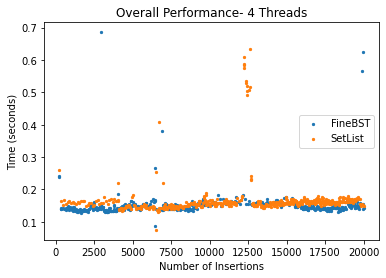

In [89]:
thread_no = 4
title = f"Overall Performance- {thread_no} Threads"
plt.title(title)
plt.xlabel("Number of Insertions")
plt.ylabel("Time (seconds)")

X_BST = list(time_overall_bst[thread_no].keys())
Y_BST = [ i*1e-6 for i in time_overall_bst[thread_no].values() ]

X_SL = list(time_overall_sl[thread_no].keys())
Y_SL = [ i*1e-6 for i in time_overall_sl[thread_no].values()]

plt.scatter(X_BST, Y_BST, label = f"FineBST",s=5)
plt.scatter(X_SL, Y_SL, label = f"SetList",s=5)

#plt.savefig(f'figures/{title}.jpg')
plt.legend()
plt.show()

In [90]:
def plot_comparison(datatype):
    thread_no = 4
    title = f"Overall vs Crawler - {datatype}, {thread_no} Threads"
    plt.title(title)
    plt.xlabel("Number of Insertions")
    plt.ylabel("Time (seconds)")

    time_overall = time_overall_bst if datatype == "FineBST" else time_overall_sl
    X_Overall = list( time_overall[thread_no].keys() )
    Y_Overall = [ i*1e-6 for i in time_overall[thread_no].values()]

    time_crawler = time_crawler_bst if datatype == "FineBST" else time_crawler_sl
    X_Crawler = list( time_crawler[thread_no].keys() )
    Y_Crawler = [ i*1e-6 for i in time_crawler[thread_no].values()]

    plt.scatter(X_Overall, Y_Overall, label = f"Overall", s=5)
    plt.scatter(X_Crawler, Y_Crawler, label = f"Crawler", s=5)

    #plt.savefig(f'figures/{title}.jpg')
    plt.legend()
    plt.show()

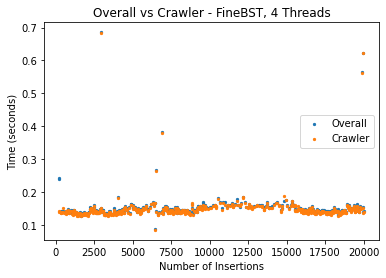

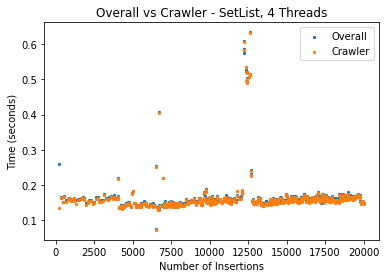

In [91]:
for datatype in ["FineBST", "SetList"]:
    plot_comparison(datatype)